## Student Information
Name: Pohao-Henry Lin Huang

Student ID: 103032027

GitHub ID: [phlinhng](https://github.com/phlinhng)

---

## Table of Contents
### Part 1: Take Home Exercises
1. Exercise 5
2. Exercise 6
3. Exercise 8
4. Exercise 10
5. Exercise 11
6. Exercise 12
7. Exercise 13
8. Exercise 14
9. Exercise 15

### Part 2: Operation with New Datasets
1.	Data Prepartion & Transformation

## Part 1: Take Home Exercises

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
# add category to the dataframe
X['category'] = twenty_train.target

In [6]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### Exercise 5
Please check the data and the process below, describe what you observe and why it happened.

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer
Since `isnull()` only treats **na.nan and (blank)** as missing value. But id c,d,and e are **strings** with words **"NaN"** , **"None"** and **'\n'**, so `isnull()` sees them as values and returns false.

### Exercise 6
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
X_sample = X.sample(n=1000)

In [10]:
len(X_sample)

1000

In [11]:
len(X)

2257

In [12]:
X[-10:]

,text,category,category_name
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


#### Answer
Everything remain the same in X. Function `sample` only create a partial copy of X, so there is no overwrite couducted on the original dataset, X.

### Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

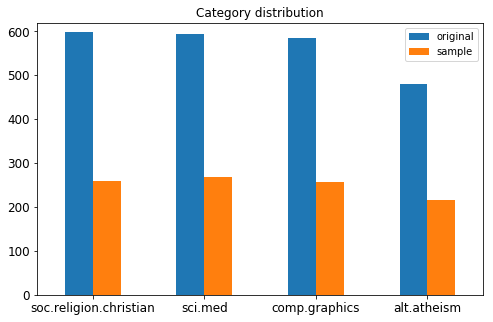

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

upper_bound = max(X.category_name.value_counts()) + 20

df = pd.concat([X['category_name'].value_counts(), X_sample['category_name'].value_counts()], axis=1, sort=False)
df.columns = ["original","sample"]
df.plot(kind="bar", title = 'Category distribution',
        ylim = [0, upper_bound], rot = 0,fontsize = 12, figsize=(8,5))
plt.legend(loc='upper right')

### Exercise 10

In [14]:
import nltk
import helpers.data_mining_helpers as dmh

In [15]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [17]:
x1 = X_counts[0:5, 0:100].toarray()

#### Answer
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [18]:
for i in range(len(x1)):
    for j in range(len(x1[0])):
        if(x1[i,j] > 0): print ( count_vect.get_feature_names()[i*len(x1[0])+j], "appears", x1[i,j], "times")                    

11705 appears 1 times
120352 appears 1 times


### Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

#### Answer
Since the whole datasets had a huge dimension, we had to apply sampling method to avoid long execution time and highly frequent crashings. A simple way is to randomly pick number for every n-th and m-th entires in docs and terms separtely. By adjusting n and m, we might finally reach some useful results.

In [25]:
sample1 = list(X.index)[::80]
sample2 = count_vect.get_feature_names()[::500]
plot_x = ["doc_"+ str(i) for i in sample1]
plot_y = ["term_"+str(i) for i in sample2]
plot_z = X_counts[::80,::500].toarray()

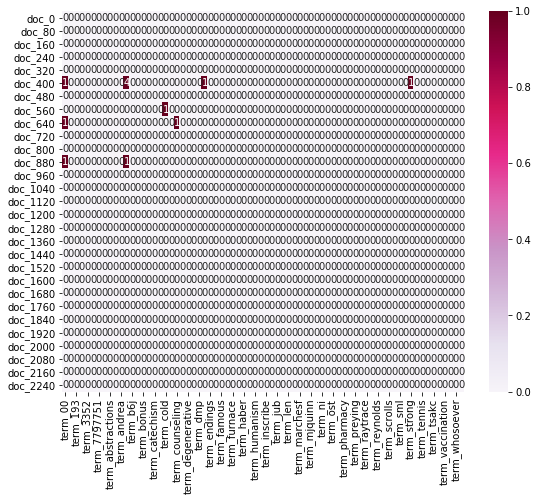

In [26]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_y, index = plot_x)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

In [29]:
from sklearn.decomposition import PCA

In [31]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [43]:
col = ['coral', 'blue', 'black', 'm']

# plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (100,100))
ax = plt.subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nY Label')

plt.show()

## Part 2: Operation with New Datasets

### 1. Data Prepartion & Transformation

In [58]:
import pandas as pd
data1=pd.read_csv("./sentiment labelled sentences/amazon_cells_labelled.txt", header=None , sep="	",
                  names=["text","score"])
data1["source_name"]="amaz"
data2=pd.read_csv("./sentiment labelled sentences/imdb_labelled.txt", header=None , sep="	",
                  names=["text","score"])
data2["source_name"]="imdb"
data3=pd.read_csv("./sentiment labelled sentences/yelp_labelled.txt", header=None , sep="	",
                  names=["text","score"])
data3["source_name"]="yelp"
datas=[data1,data2,data3]
X=pd.concat(datas)

[                                                  text  score source_name
 0    So there is no way for me to plug it in here i...      0        amaz
 1                          Good case, Excellent value.      1        amaz
 2                               Great for the jawbone.      1        amaz
 3    Tied to charger for conversations lasting more...      0        amaz
 4                                    The mic is great.      1        amaz
 5    I have to jiggle the plug to get it to line up...      0        amaz
 6    If you have several dozen or several hundred c...      0        amaz
 7          If you are Razr owner...you must have this!      1        amaz
 8                  Needless to say, I wasted my money.      0        amaz
 9                     What a waste of money and time!.      0        amaz
 10                     And the sound quality is great.      1        amaz
 11   He was very impressed when going from the orig...      1        amaz
 12   If the two were sep